In [54]:
pip install pandas openpyxl nltk


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (run this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the Excel file
file_path = r"D:\ML\Assignment 3\audio21.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Define text preprocessing functions
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)  # or use lemmatization(tokens)
    return ' '.join(tokens)  # Join tokens back into a single string

# Apply preprocessing to the TEXT column (capitalized)
df['PROCESSED_TEXT'] = df['TEXT'].apply(preprocess_text)

# Display the DataFrame with the original and processed text
print(df[['TEXT', 'PROCESSED_TEXT']])

# Convert processed text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['PROCESSED_TEXT'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)

# Optionally, save the processed DataFrame and TF-IDF vectors to a new Excel file
output_file_path = r"D:\ML\Assignment 3\prepro.xlsx"  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

# Save the TF-IDF matrix to a separate Excel file
tfidf_output_file_path = r"D:\ML\Assignment 3\vector.xlsx"  # Replace with your desired output path
tfidf_df.to_excel(tfidf_output_file_path, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                  TEXT  \
0                                                 OK.    
1                                        So Priyanka.    
2                                           Yes, Sir.    
3                                  How are you today?    
4                                      I'm fine, Sir.    
..                                                 ...   
235  Yes, Sir. I think at this point we've gotten u...   
236      Wonderful. Thank you very much. Have a good.    
237                                              Day.    
238                                       Thank you.     
239                                   Thank you, Sir.    

                                        PROCESSED_TEXT  
0                                                   ok  
1                                             priyanka  
2                                               ye sir  
3                                                today  
4                 

In [7]:
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (run this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the Excel file
input_file_path = r"D:\ML\Assignment 3\audio21.xlsx"  # Replace with your actual input file path
df = pd.read_excel(input_file_path)

# Define text preprocessing functions
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)  # or use lemmatization(tokens)
    return ' '.join(tokens)  # Join tokens back into a single string

# Apply preprocessing to the TEXT column (capitalized)
df['PROCESSED_TEXT'] = df['TEXT'].apply(preprocess_text)

# Display the DataFrame with the original and processed text
print(df[['TEXT', 'PROCESSED_TEXT']])

# Convert processed text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['PROCESSED_TEXT'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)

# Specify the output file paths
processed_output_file_path = r"D:\ML\Assignment 3\pre1.xlsx" # Replace with your desired processed file path
tfidf_output_file_path = r"D:\ML\Assignment 3\vec1.xlsx"  # Replace with your desired TF-IDF vectors path

# Save the processed DataFrame to a new Excel file
df.to_excel(processed_output_file_path, index=False)

# Save the TF-IDF matrix to a separate Excel file
tfidf_df.to_excel(tfidf_output_file_path, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                  TEXT  \
0                                                 OK.    
1                                        So Priyanka.    
2                                           Yes, Sir.    
3                                  How are you today?    
4                                      I'm fine, Sir.    
..                                                 ...   
235  Yes, Sir. I think at this point we've gotten u...   
236      Wonderful. Thank you very much. Have a good.    
237                                              Day.    
238                                       Thank you.     
239                                   Thank you, Sir.    

                                        PROCESSED_TEXT  
0                                                   ok  
1                                             priyanka  
2                                               ye sir  
3                                                today  
4                 

In [9]:
import pandas as pd
import numpy as np

# Load the preprocessed text and TF-IDF vectors
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"  # Replace with your actual preprocessed file path
tfidf_file_path = r"D:\ML\Assignment 3\vec1.xlsx" # Replace with your actual TF-IDF vectors file path

# Load the preprocessed data
preprocessed_df = pd.read_excel(preprocessed_file_path)

# Load the TF-IDF vectors
tfidf_df = pd.read_excel(tfidf_file_path)

# Assuming LABEL is the column that contains the class labels
labels = preprocessed_df['LABEL']

# Select two classes for evaluation (e.g., 'question' and 'answer')
class_1 = 'Question'
class_2 = 'Answer'

# Get the indices for each class
class_1_indices = np.where(labels == class_1)[0]
class_2_indices = np.where(labels == class_2)[0]

# Calculate the centroids (mean vectors) for each class
centroid_1 = tfidf_df.iloc[class_1_indices].mean(axis=0)
centroid_2 = tfidf_df.iloc[class_2_indices].mean(axis=0)

# Calculate the spread (standard deviation) for each class
spread_1 = tfidf_df.iloc[class_1_indices].std(axis=0)
spread_2 = tfidf_df.iloc[class_2_indices].std(axis=0)

# Calculate the distance between the centroids
interclass_distance = np.linalg.norm(centroid_1 - centroid_2)

# Output the results
print(f"Centroid for {class_1}: {centroid_1.values}")
print(f"Centroid for {class_2}: {centroid_2.values}")

print(f"Spread for {class_1}: {spread_1.values}")
print(f"Spread for {class_2}: {spread_2.values}")

print(f"Euclidean distance between {class_1} and {class_2}: {interclass_distance}")


Centroid for Question: [0.00645285 0.         0.         0.         0.00665143 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01035935 0.         0.00574478 0.00750158
 0.         0.         0.         0.02057619 0.         0.
 0.         0.         0.         0.02173837 0.         0.
 0.         0.         0.         0.01532555 0.         0.00723204
 0.01208893 0.         0.         0.01016559 0.         0.
 0.         0.         0.01153332 0.00544743 0.         0.00718998
 0.         0.         0.01261399 0.00719327 0.         0.00862046
 0.         0.         0.         0.         0.0053614  0.
 0.00600109 0.         0.         0.         0.         0.00718998
 0.         0.00675729 0.         0.         0.         0.
 0.0052544  0.00574478 0.         0.         0.         0.
 0.         0.01227473 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00701091 0.         0.     

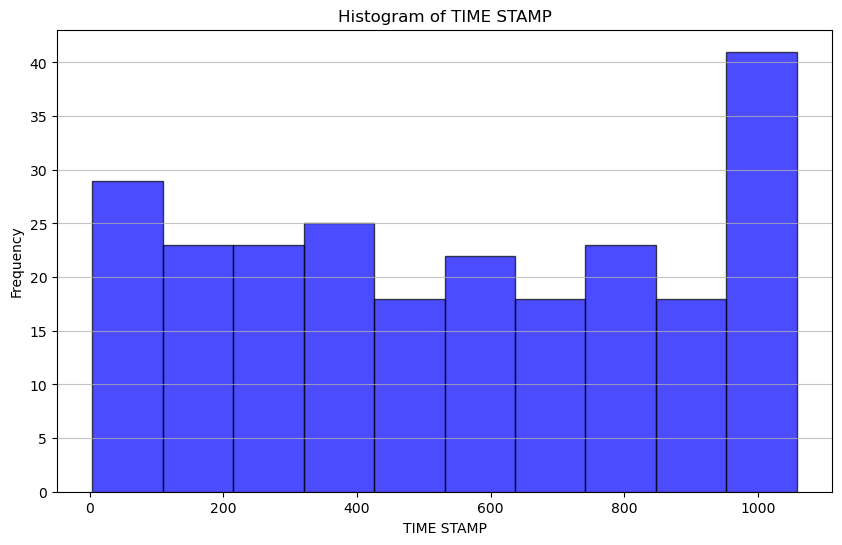

Mean of TIME STAMP: 540.1083333333333
Variance of TIME STAMP: 110202.78826388893


In [37]:
#A2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(preprocessed_file_path):
    return pd.read_excel(preprocessed_file_path)

def convert_time_to_seconds(time_str):
    """Convert a time string in the format 'HH:MM:SS' to total seconds."""
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        return np.nan  # Return NaN for invalid formats

def plot_histogram(data, feature, bins=10):
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature], bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

def calculate_mean_variance(data, feature):
    mean = np.mean(data[feature])
    variance = np.var(data[feature])
    return mean, variance

# Main execution
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"   # Replace with your actual preprocessed file path

# Load data
data = load_data(preprocessed_file_path)

# Convert 'TIME STAMP' to total seconds
data['TIME STAMP'] = data['TIME STAMP'].apply(convert_time_to_seconds)

# Check for NaN values after conversion
if data['TIME STAMP'].isnull().any():
    print("Warning: Some time stamps could not be converted and will be ignored.")

# Plot histogram for the 'TIME STAMP' feature
plot_histogram(data, 'TIME STAMP', bins=10)

# Calculate mean and variance for the 'TIME STAMP' feature
mean, variance = calculate_mean_variance(data, 'TIME STAMP')

# Output results
print(f'Mean of TIME STAMP: {mean}')
print(f'Variance of TIME STAMP: {variance}')



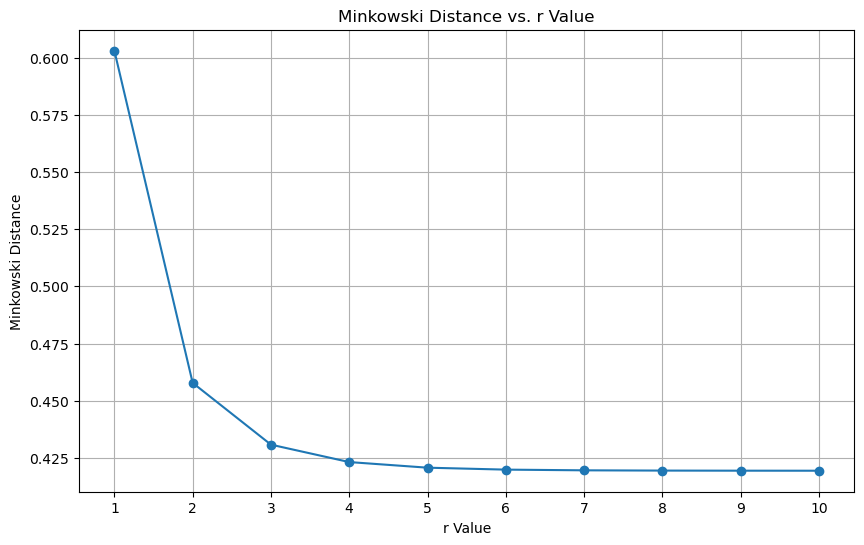

In [39]:
#A3


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(tfidf_file_path):
    return pd.read_excel(tfidf_file_path)

def minkowski_distance(x, y, r):
    """Calculate the Minkowski distance between two vectors."""
    return np.sum(np.abs(x - y) ** r) ** (1/r)

def calculate_distances(data, feature_1, feature_2, r_values):
    distances = []
    vector_1 = data[feature_1].values
    vector_2 = data[feature_2].values
    
    for r in r_values:
        distance = minkowski_distance(vector_1, vector_2, r)
        distances.append(distance)
    
    return distances

def plot_distances(r_values, distances):
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, distances, marker='o')
    plt.title('Minkowski Distance vs. r Value')
    plt.xlabel('r Value')
    plt.ylabel('Minkowski Distance')
    plt.xticks(r_values)
    plt.grid()
    plt.show()

# Main execution
tfidf_file_path = r"D:\ML\Assignment 3\vec1.xlsx"  # Replace with your actual TF-IDF vectors file path

# Load data
tfidf_df = load_data(tfidf_file_path)

# Select two features to analyze from the TF-IDF DataFrame
# Assuming the TF-IDF DataFrame has multiple columns
feature_1 = tfidf_df.columns[0]  # Select the first feature (word)
feature_2 = tfidf_df.columns[1]  # Select the second feature (another word)

# Define the range of r values
r_values = range(1, 11)  # r from 1 to 10

# Calculate Minkowski distances
distances = calculate_distances(tfidf_df, feature_1, feature_2, r_values)

# Plot the distances
plot_distances(r_values, distances)



In [90]:
#A4


import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(preprocessed_file_path):
    return pd.read_excel(preprocessed_file_path)

# Main execution
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"   # Replace with your actual preprocessed file path

# Load data
data = load_data(preprocessed_file_path)

# Filter the dataset to include only two classes
# Here, we will take 'Question' and 'Answer' as an example
filtered_data = data[data['LABEL'].isin(['Question', 'Answer'])]

# Prepare feature vectors (X) and class labels (y)
# Assuming we want to use 'PROCESSED_TEXT' as the feature
X = filtered_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
y = filtered_data['LABEL']  # Use the LABEL column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the sizes of the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 95
Testing set size: 42


In [108]:
#A5


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

def load_data(preprocessed_file_path):
    return pd.read_excel(preprocessed_file_path)

# Main execution
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"  # Replace with your actual preprocessed file path

# Load data
data = load_data(preprocessed_file_path)

# Filter the dataset to include only two classes
class_1 = 'Question'
class_2 = 'Answer'
filtered_data = data[data['LABEL'].isin([class_1, class_2])]

# Check if filtered_data is empty
if filtered_data.empty:
    print("No data available for the selected classes: 'Question' and 'Answer'.")
else:
    # Prepare feature vectors (X) and class labels (y)
    X = filtered_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
    y = filtered_data['LABEL']  # Use the LABEL column as the target variable

    # Handle NaN values in X
    if X.isnull().any():
        filtered_data = filtered_data.dropna(subset=['PROCESSED_TEXT'])
        X = filtered_data['PROCESSED_TEXT']
        y = filtered_data['LABEL']

    # Convert text data to numerical format using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

    # Train the k-NN classifier with k=3
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Output the training results
    print("k-NN classifier trained with k=3.")

    # Testing the accuracy of the classifier
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the k-NN classifier on the test set: {accuracy:.2f}")

   




k-NN classifier trained with k=3.
Accuracy of the k-NN classifier on the test set: 0.59


In [80]:
#A6


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

def load_data(preprocessed_file_path):
    return pd.read_excel(preprocessed_file_path)

# Main execution
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"  # Replace with your actual preprocessed file path

# Load data
data = load_data(preprocessed_file_path)

# Filter the dataset to include only two classes
class_1 = 'Question'
class_2 = 'Answer'
filtered_data = data[data['LABEL'].isin([class_1, class_2])]

# Prepare feature vectors (X) and class labels (y)
X = filtered_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
y = filtered_data['LABEL']  # Use the LABEL column as the target variable

# Handle NaN values in X
if X.isnull().any():
    filtered_data = filtered_data.dropna(subset=['PROCESSED_TEXT'])
    X = filtered_data['PROCESSED_TEXT']
    y = filtered_data['LABEL']

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Train the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Output the training results
print("k-NN classifier trained with k=3.")

# Test the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of the k-NN classifier on the test set: {accuracy:.2f}")

# Generate predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


k-NN classifier trained with k=3.
Accuracy of the k-NN classifier on the test set: 0.59
Confusion Matrix:
[[15  7]
 [ 9  8]]
Classification Report:
              precision    recall  f1-score   support

      Answer       0.62      0.68      0.65        22
    Question       0.53      0.47      0.50        17

    accuracy                           0.59        39
   macro avg       0.58      0.58      0.58        39
weighted avg       0.59      0.59      0.59        39



In [146]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets with specified encoding
preprocessed_file_path = r"D:\pre1 1(Sheet1).csv"  # Path to the labels
vec_file_path = r"D:\vec1(Sheet1).csv"  # Path to the feature vectors

# Load label data with a different encoding
label_data = pd.read_csv(preprocessed_file_path, encoding='ISO-8859-1')

# Load vector data with a different encoding
vector_data = pd.read_csv(vec_file_path, encoding='ISO-8859-1')

# Filter the dataset to include only two classes
class_1 = 'Question'
class_2 = 'Answer'
filtered_label_data = label_data[label_data['LABEL'].isin([class_1, class_2])]

# Prepare feature vectors (X) and class labels (y)
X_labels = filtered_label_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
y_labels = filtered_label_data['LABEL']  # Use the LABEL column as the target variable

# Handle NaN values in X_labels
if X_labels.isnull().any():
    filtered_label_data = filtered_label_data.dropna(subset=['PROCESSED_TEXT'])
    X_labels = filtered_label_data['PROCESSED_TEXT']
    y_labels = filtered_label_data['LABEL']

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_labels)

# Train the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_vectorized, y_labels)

# Prepare the test vectors from vec1
# Use the numerical features directly from vec1
X_test_vectorized = vector_data.values  # Load the numerical feature vectors

# Ensure the test data has the same number of features as the training data
if X_test_vectorized.shape[1] != X_vectorized.shape[1]:
    raise ValueError(f"Test data has {X_test_vectorized.shape[1]} features, but the model expects {X_vectorized.shape[1]} features.")

# Predict the classes for the test vectors
predictions = knn.predict(X_test_vectorized)

# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Test Vector {i+1}: Predicted Class = {prediction}")

ValueError: Test data has 375 features, but the model expects 293 features.

Accuracy for k=1: 0.62
Accuracy for k=2: 0.62
Accuracy for k=3: 0.65
Accuracy for k=4: 0.69
Accuracy for k=5: 0.65
Accuracy for k=6: 0.69
Accuracy for k=7: 0.73
Accuracy for k=8: 0.73
Accuracy for k=9: 0.77
Accuracy for k=10: 0.81
Accuracy for k=11: 0.73


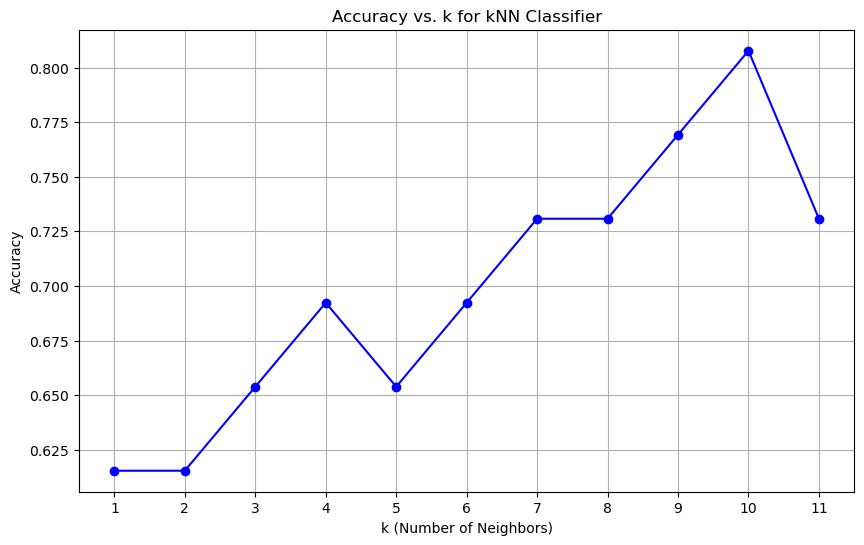

In [150]:
#A8


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"  # Path to the labels
vec_file_path = r"D:\ML\Assignment 3\vec1.xlsx"  # Path to the feature vectors

# Load label data
label_data = pd.read_excel(preprocessed_file_path)

# Load vector data
vector_data = pd.read_excel(vec_file_path)

# Filter the dataset to include only two classes
class_1 = 'Question'
class_2 = 'Answer'
filtered_label_data = label_data[label_data['LABEL'].isin([class_1, class_2])]

# Prepare feature vectors (X) and class labels (y)
X_labels = filtered_label_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
y_labels = filtered_label_data['LABEL']  # Use the LABEL column as the target variable

# Handle NaN values in X_labels
if X_labels.isnull().any():
    filtered_label_data = filtered_label_data.dropna(subset=['PROCESSED_TEXT'])
    X_labels = filtered_label_data['PROCESSED_TEXT']
    y_labels = filtered_label_data['LABEL']

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_labels, test_size=0.2, random_state=42)

# Initialize lists to store the values of k and corresponding accuracies
k_values = list(range(1, 12))
accuracies = []

# Train and evaluate the classifier for each value of k
for k in k_values:
    # Initialize kNN classifier with the current value of k
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    neigh.fit(X_train, y_train)
    
    # Calculate the accuracy on the test set and store it
    accuracy = neigh.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

# Plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()



Evaluating for k=1...

Confusion Matrix for Training Data (k=1):
 [[55  0]
 [ 0 46]]
Confusion Matrix for Test Data (k=1):
 [[10  6]
 [ 4  6]]
Classification Report for Training Data (k=1):
              precision    recall  f1-score   support

      Answer       1.00      1.00      1.00        55
    Question       1.00      1.00      1.00        46

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Classification Report for Test Data (k=1):
              precision    recall  f1-score   support

      Answer       0.71      0.62      0.67        16
    Question       0.50      0.60      0.55        10

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.63      0.62      0.62        26


Evaluating for k=2...

Confusion Matrix for Training Data (k=2):
 [[55  0]
 [22 24]]
Confusion Matrix for Test 

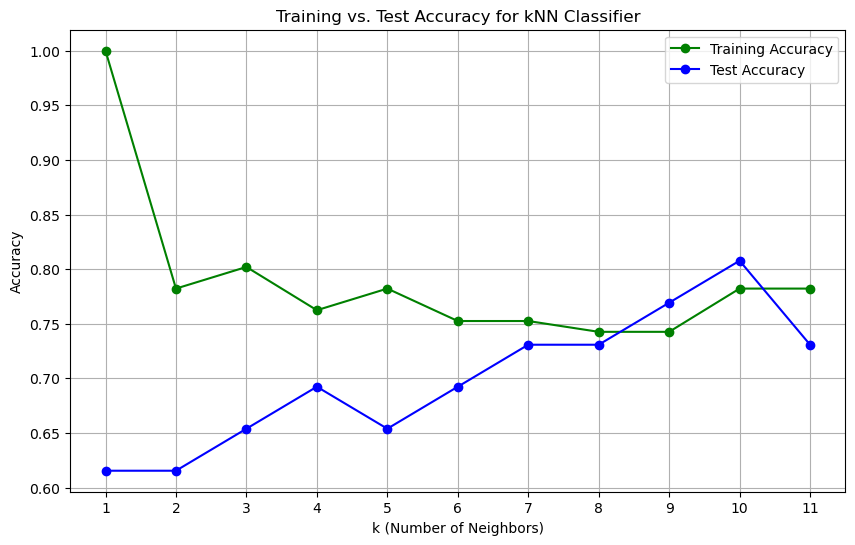

The model may be overfitting.


In [152]:
#A9


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the datasets
preprocessed_file_path = r"D:\ML\Assignment 3\pre1.xlsx"  # Path to the labels
vec_file_path = r"D:\ML\Assignment 3\vec1.xlsx"  # Path to the feature vectors

# Load label data
label_data = pd.read_excel(preprocessed_file_path)

# Load vector data
vector_data = pd.read_excel(vec_file_path)

# Filter the dataset to include only two classes
class_1 = 'Question'
class_2 = 'Answer'
filtered_label_data = label_data[label_data['LABEL'].isin([class_1, class_2])]

# Prepare feature vectors (X) and class labels (y)
X_labels = filtered_label_data['PROCESSED_TEXT']  # Use the PROCESSED_TEXT column as the feature
y_labels = filtered_label_data['LABEL']  # Use the LABEL column as the target variable

# Handle NaN values in X_labels
if X_labels.isnull().any():
    filtered_label_data = filtered_label_data.dropna(subset=['PROCESSED_TEXT'])
    X_labels = filtered_label_data['PROCESSED_TEXT']
    y_labels = filtered_label_data['LABEL']

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_labels, test_size=0.2, random_state=42)

# Function to evaluate performance metrics
def evaluate_performance(knn, X_train, y_train, X_test, y_test, k):
    # Predict on training data
    y_train_pred = knn.predict(X_train)
    
    # Predict on test data
    y_test_pred = knn.predict(X_test)
    
    # Calculate confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    # Print confusion matrices
    print(f"Confusion Matrix for Training Data (k={k}):\n", train_cm)
    print(f"Confusion Matrix for Test Data (k={k}):\n", test_cm)
    
    # Calculate classification reports
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Print classification reports
    print(f"Classification Report for Training Data (k={k}):")
    print(classification_report(y_train, y_train_pred))
    print(f"Classification Report for Test Data (k={k}):")
    print(classification_report(y_test, y_test_pred))
    
    return train_report, test_report

# Initialize lists to store the values of k and corresponding accuracy metrics
k_values = list(range(1, 12))
train_accuracies = []
test_accuracies = []

# Train and evaluate the classifier for each value of k
for k in k_values:
    # Initialize kNN classifier with the current value of k
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    neigh.fit(X_train, y_train)
    
    # Evaluate and print performance metrics
    print(f"\nEvaluating for k={k}...\n")
    train_report, test_report = evaluate_performance(neigh, X_train, y_train, X_test, y_test, k)
    
    # Store accuracy metrics
    train_accuracies.append(train_report['accuracy'])
    test_accuracies.append(test_report['accuracy'])

# Plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', color='g', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.title('Training vs. Test Accuracy for kNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Determine model fit based on accuracy trends
if max(test_accuracies) < max(train_accuracies):
    print("The model may be overfitting.")
elif max(test_accuracies) == max(train_accuracies):
    print("The model is likely well-fitted.")
else:
    print("The model may be underfitting.")
